In [1]:
# Author: Brent Artuch
# Date: 2024-10-04
import numpy as np
import sympy as sp
import spb
import pandas as pd
from IPython.display import *
import matplotlib.pyplot as plt

sp.init_printing()

## 1.3 - Probability
#### Discrete Variables
Imagine a room of 14 people with the following ages:
* 1 person age 14
* 1 person age 15
* 3 people age 16
* 2 people age 22
* 2 people age 24
* 5 people age 25
<br><br>
We can reference the number of people by age with the function $N(j)$, where $j$ is the age value.

In [2]:
R = [(1,14),(1,15),(3,16),(2,22),(2,24),(5,25)]
def number_of_people(age, R):
    for age_count in R:
        if age_count[1] == age:
            return age_count[0]
    print("No one in the room is the given age.")

number_of_people(22, R)

The total number of people $N$ can be expressed by the function: $$N=\sum_{j=0}^{\infty}N(j)$$

In [3]:
def total_number_of_people(R):
    total = 0
    for age_count in R:
        total += number_of_people(age_count[1], R)
    return total

total_number_of_people(R)

<Axes: title={'center': 'Number of People, $N(j)$, with $j$ age'}, xlabel='$j$', ylabel='$N(j)$'>

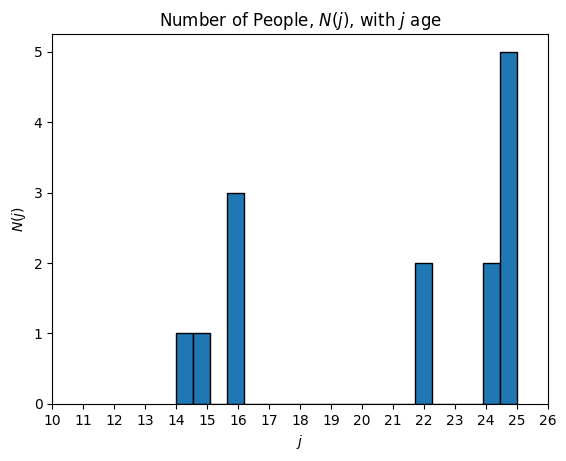

In [4]:
# Histogram plot showing the number of prople for each N(j)
data = [14,15,16,16,16,22,22,24,24,25,25,25,25,25]
room = pd.Series(data)
room.plot.hist(
    bins=20, title=r"Number of People, $N(j)$, with $j$ age", xlabel=r"$j$",
    ylabel=r"$N(j)$", xticks=list(range(10,27)), edgecolor="black"
)

The probability of someone being a particular age(s) can be expressed as: $$P(j)=\frac{N(j)}{N}=1$$

In [5]:
def probability_of_age(ages, R):
    num_people = 0
    for age in ages:
        num_people += number_of_people(age, R)
    probability = num_people/total_number_of_people(R)
    return probability

sp.nsimplify(probability_of_age([14,15], R), rational=True)

Average age is denoted: $$\langle j\rangle=\frac{\sum jN(j)}{N}=\sum_{j=0}^{\infty}jP(j)$$

In [6]:
def average_age(R):
    average = 0
    for age_count in R:
        average += age_count[1] * probability_of_age([age_count[1]], R)
    return average

average_age(R)

The average of a function of the age $j$ is given by: $$\langle f(j)\rangle=\sum_{j=0}^{\infty}f(j)P(j)$$

In [7]:
# Example 
j = sp.symbols("j")
def average_of_function(function, R):   
    average = 0
    for age_count in R:
        average += function.subs(j,age_count[1]) * probability_of_age([age_count[1]], R)
    return average

function = j**2
average_of_function(function, R)

The variance of the distribtuion is: $$\sigma^{2}\equiv\langle j^2\rangle-\langle j\rangle^2$$

In [8]:
def variance_of_ages(R):
    function = j**2
    return average_of_function(function,R) - average_age(R)**2

variance_of_ages(R)

The standard deviation is: $$\sigma=\sqrt{\langle j^2\rangle-\langle j\rangle^2}$$

In [9]:
def standard_deviation(R):
    return sp.sqrt(variance_of_ages(R))

standard_deviation(R)

#### Continuous Variables
Probability Density - The probability that $x$ lies between $a$ and $b$ is given by the integral.
$$
P_{ab}=\int_{a}^{b}\rho(x)dx
$$
Corresponding properties to match descrete variants:
\begin{align*}
&\int_{-\infty}^{+\infty}\rho(x)dx=1\\
&\langle x\rangle=\int_{-\infty}^{+\infty}x\rho(x)dx\\
&\langle f(x)\rangle=\int_{-\infty}^{+\infty}f(x)\rho(x)dx\\
&\sigma^{2}\equiv\langle x^2\rangle-\langle x\rangle^2
\end{align*}

Full Continuous Example:<br>
Object falls from Height $h$. One million distance measurements at random intervals are taken as the object falls (this large sample emulates the whole continuum). What is the time average of the distance traveled?<br>
Answer:<br>
In vacuum, the distance $x$ at time $t$ is:
$$
x(t)=\frac{1}{2}gt^2
$$
The velocity is $dx/dt = gt$, the total flight time is $T=\sqrt{2h/g}$, and the probability that a measurement was taken between $t$ and $t+dt$ is $dt/T$.<br> 
\begin{align*}
\frac{dt}{T}&=\frac{dx}{gt}\sqrt{\frac{g}{2h}}
\end{align*}
Solve for $t$ using the distance equation:<br>
\begin{align*}
x&=\frac{1}{2}gt^2\rightarrow 2x=gt^2\rightarrow \frac{2x}{g}=t^2\rightarrow t=\sqrt{\frac{2x}{g}}
\end{align*}
Plug in $t$ and solve:
\begin{align*}
\frac{dt}{T}&=\frac{dx\sqrt{g}}{g\sqrt{\frac{2x}{g}}\sqrt{2h}}=\frac{dx\sqrt{g}}{\sqrt{2xg}\sqrt{2h}}=\frac{dx}{\sqrt{2x}\sqrt{2h}}=\frac{dx}{2\sqrt{xh}}
\end{align*}
The probability density is:
\begin{align*}
\rho(x)=\frac{dx}{2\sqrt{xh}} \ \ \ \text{ where. } \ \ \ (0\le x\le h) 
\end{align*}
Check that the results equal 1:
\begin{align*}
\int_{a}^{b}\rho(x)dx=\int_{0}^{h}\frac{dx}{2\sqrt{xh}}=\frac{1}{2\sqrt{h}}\int_{0}^{h}\frac{1}{\sqrt{x}}dx=\frac{1}{2\sqrt{h}} (2\sqrt{x})\Big|_0^h=\frac{1}{2\sqrt{h}} (2\sqrt{h})=1
\end{align*}
Note: Recall that a definite integral from $a$ to $b$ in terms of $x$ is:
\begin{align*}
\int_{a}^{b}kx^{m}dx=k\int_{a}^{b}x^{m}dx=k\left( \frac{x^{m+1}}{m+1} \right)\Big|_a^b=k\left( \frac{b^{m+1}}{m+1} - \frac{a^{m+1}}{m+1}\right)
\end{align*}
Lastly, find the average distance:
\begin{align*}
\langle x\rangle=\int_{0}^{h}x\frac{dx}{2\sqrt{xh}}=\frac{1}{2\sqrt{h}}\int_{0}^{h}\frac{x}{\sqrt{x}}dx=\frac{1}{2\sqrt{h}} \left(\frac{2x^{3/2}}{3}\right)\Big|_0^h=\frac{1}{2\sqrt{h}} \left(\frac{2h^{3/2}}{3}\right)=\frac{h^{3/2-1/2}}{3}=\frac{h}{3}
\end{align*}

In [10]:
# Calculate with code
# Define the variables
h,x,g,t,dx = sp.symbols("h,x,g,t,dx")
# Define the distance equation x(t)
distance_equation = sp.Eq(sp.Rational(1,2)*g*t**2, x)
# Solve the distance equation for time t
de_in_terms_of_t = sp.solve(distance_equation, t)
# Set t equal to the positive value from the quadratic equation
t = de_in_terms_of_t[1]
# Define change in time dt
dt = dx/(g*t)
# Define total time T
T = sp.sqrt((2*h)/g)
# Solve dt/T
dt_over_T = dt/T
# Integrate to ensure the results equal 1
is_equal_to_one = sp.integrate(dt_over_T,(x,0,h)) == dx
# Find the average distance
average_x = sp.integrate(x*dt_over_T,(x,0,h))

# Display results 
display(is_equal_to_one)
display(average_x.simplify())

True

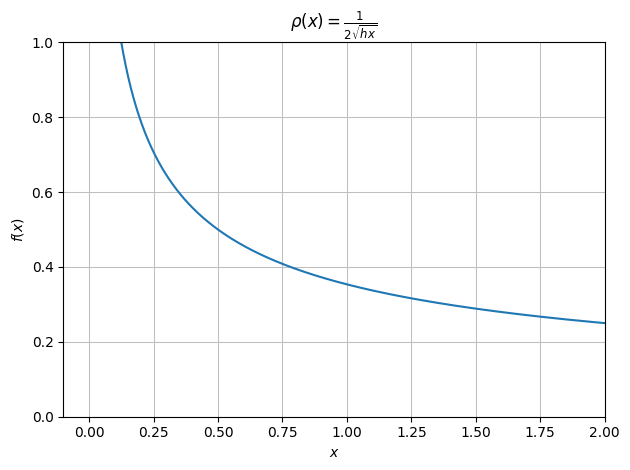

In [11]:
h=2
# Note: the range of the funciotn begins ate 1/2h and the max probability , y, is 1.
spb.plot(1/(2*sp.sqrt(x*h)), (x,0.0000001,h), xlim=(-0.1,2), ylim=(0,1), title=r"$\rho(x)=\frac{1}{2\sqrt{hx}}$")

Find the standard deviation by first solving for $\langle x^2\rangle$: <br>
\begin{align*}
\langle x^2\rangle=\int_{0}^{h}x^2\frac{dx}{2\sqrt{xh}}=\frac{1}{2\sqrt{h}}\int_{0}^{h}\frac{x^2}{\sqrt{x}}dx=\frac{1}{2\sqrt{h}} \left(\frac{2x^{5/2}}{5}\right)\Big|_0^h=\frac{1}{2\sqrt{h}} \left(\frac{2h^{5/2}}{5}\right)=\frac{h^{5/2-1/2}}{5}=\frac{h^2}{5}
\end{align*}
Now we can calculate the variance $\sigma^2$:
\begin{align*}
\sigma^2=\langle x^2\rangle - \langle x\rangle^2=\frac{h^2}{5}-\frac{h}{3}^2=\frac{h^2}{5}-\frac{h^2}{9}=\frac{4h^2}{45}
\end{align*}
and finally the standard deviation $\sigma$:
\begin{align*}
\sigma=\sqrt{\frac{4h^2}{45}}=\frac{2h}{3\sqrt{5}}
\end{align*}

In [12]:
# Use sympy to find the standard deviation
h,x,g,t,dx = sp.symbols("h,x,g,t,dx")
average_squared_x = sp.integrate((x**2)*dt_over_T,(x,0,h))
sigma_squared = average_squared_x - average_x**2
sigma = sp.sqrt(sigma_squared)
sigma.simplify() 

In [13]:
# Prove that this does in fact equal the latex expression above
test_sigma = sp.lambdify((dx,h,g),sigma)
test_latex_sigma = sp.lambdify((h), (2*h)/sp.sqrt(45))
test_sigma(1,2,1) == test_latex_sigma(2)

np.True_